In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import pandas as pd
import copy
import pickle
from networkFunctions import *
from plotFunctions import *
from populationGraph import populationGraph
from adversarialAgent import adversarialAgent

In [2]:
#Network parameters
msgUtility = 10
costFactor = 0.1
numNodes = 100
numMsg = 10000
myseed = 67
maxEpochs = 10000
msgCost = costFactor*msgUtility

In [3]:
dict = {"msgUtility" : 10,
"costFactor" : 0.1,
"numNodes" : 100,
"numMsg" : 1000,
"myseed" : 32,}

In [4]:
prevStates = []
commonAttrs = {"burnoutThreshold":2*(dict["numMsg"]*dict["costFactor"]*dict["msgUtility"])/dict["numNodes"],
"burnoutDrop":2,"gamma":1, "maxVirtueUtility" : 2*(dict["numMsg"]/dict["numNodes"]), "forwardProb" : 0.5}
dict["type"] = transcendenceAgent
dict["advRatio"] = 0
attr = "advRatio"
# var = (dict["numMsg"]*dict["costFactor"]*dict["msgUtility"])/dict["numNodes"]
attrRange = np.arange(0,1.1,0.1)
dict[attr] = attrRange
outcomeNetwork = {}

for val in attrRange:
    if attr == "advRatio":
        network = populationGraph(dict["numNodes"],[1-val, val],[dict["type"], adversarialAgent], commonAttrs)
    elif attr == "type":
        network = populationGraph(dict["numNodes"],[1],[val], commonAttrs)
    else:
        commonAttrs[attr] = val
        network = populationGraph(dict["numNodes"],[1],[dict["type"]],commonAttrs,seed=2)
    e = 0
    min_run = 2
    # network.plotGraph()
    while e<maxEpochs:
        e+=1
        G = network.getGraph()
        msgList = network.createMsgs(dict["numMsg"], myseed=25)  #Message list creation
        prevStates = [copy.deepcopy(G.nodes[i]['agent']) for i in range(dict["numNodes"])]
        nf, nd = network.transmitMsgs()
        for i in range(dict["numNodes"]) : G.nodes[i]['agent'].epochUpdate()
        curStable = [G.nodes[i]['agent'].isStable(prevStates[i]) for i in range(dict["numNodes"])]
        if np.count_nonzero(curStable) == dict["numNodes"] and e > min_run:
            break
    print(e)
    # print(network.getNetworkProp('forwardProb'))
    #Test run
    # print(network.getNetworkProp('utility'))
    network.reset()
    G = network.getGraph()
    # print(network.getNetworkProp('utility'))
    msgList = network.createMsgs(dict["numMsg"])  #Message list creation
    nf, nd = network.transmitMsgs()
    # print(network.getNetworkProp('utility'))
    outcomeNetwork[val] = copy.deepcopy(network)


dict["outcomeNetwork"] = outcomeNetwork

20
20
19
19
19
19
19
19
19
19
3


In [5]:
dict

{'msgUtility': 10,
 'costFactor': 0.1,
 'numNodes': 100,
 'numMsg': 1000,
 'myseed': 32,
 'type': transcendenceAgent.transcendenceAgent,
 'advRatio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 'outcomeNetwork': {0.0: <populationGraph.populationGraph at 0x7fecfc191f70>,
  0.1: <populationGraph.populationGraph at 0x7fecfc0cc4c0>,
  0.2: <populationGraph.populationGraph at 0x7fecfc0cc940>,
  0.30000000000000004: <populationGraph.populationGraph at 0x7fecfc11fc70>,
  0.4: <populationGraph.populationGraph at 0x7fecfc5f1c70>,
  0.5: <populationGraph.populationGraph at 0x7fecfc150190>,
  0.6000000000000001: <populationGraph.populationGraph at 0x7fecfc59f130>,
  0.7000000000000001: <populationGraph.populationGraph at 0x7fecfc59f580>,
  0.8: <populationGraph.populationGraph at 0x7fecfc5f1a00>,
  0.9: <populationGraph.populationGraph at 0x7fecfc59ffd0>,
  1.0: <populationGraph.populationGraph at 0x7fecfc785df0>}}

In [6]:
pickle.dump(dict, open('pickle_files/AdvRatio/Transcendence/trans(1).pkl', 'wb'))

outcome network  {10.0: <populationGraph.populationGraph object at 0x7fd582e3d5e0>, 15.0: <populationGraph.populationGraph object at 0x7fd582e5be50>, 20.0: <populationGraph.populationGraph object at 0x7fd582e476d0>, 25.0: <populationGraph.populationGraph object at 0x7fd583e737c0>, 30.0: <populationGraph.populationGraph object at 0x7fd583e70850>, 35.0: <populationGraph.populationGraph object at 0x7fd582e477c0>, 40.0: <populationGraph.populationGraph object at 0x7fd583e70b80>, 45.0: <populationGraph.populationGraph object at 0x7fd582e3a6d0>}


[4280, 6480, 8500, 8760, 8940, 8900, 8940, 8940]

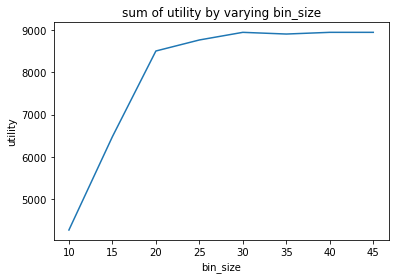

In [7]:
plotNetworkVaryParams(dict["outcomeNetwork"],"utility","bin_size")

In [ ]:
y_cost = [np.mean(i.getNetworkProp("cost")) for i in outcomeNetwork.values()]
y_utility = [np.mean(i.getNetworkProp("utility")) for i in outcomeNetwork.values()]
y_burnouts = [np.mean(i.getNetworkProp("burnout")) for i in outcomeNetwork.values()]
print(y_cost, y_utility, y_burnouts)


[19.37, 18.23, 17.42, 16.66, 15.5, 14.42, 13.89, 13.12, 12.31, 11.41] [87.4, 64.6, 48.4, 33.2, 10.0, -11.6, -22.2, -37.6, -53.8, -71.8] [0.32, 0.28, 0.24, 0.23, 0.19, 0.16, 0.13, 0.09, 0.05, 0.04]


In [ ]:
x2_binsize = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
y2_vp = [1.46, 11.06, 16.9, 18.08, 18.16, 18.16, 18.16, 18.16, 18.16, 18.16]
y4_vp = [2.92, 13.36, 22.84, 31.48, 35.48, 37.44, 37.96, 38.2, 38.2, 38.2]
y6_vp = [4.38, 14.82, 25.32, 34.68, 43.32, 50.52, 53.46, 55.44, 56.82, 57.06]
y8_vp = [5.84, 18.64, 28.56, 35.76, 46.24, 56.32, 63.04, 67.68, 71.28, 73.92]


In [ ]:
y8_cost = [15.32, 16.09, 16.7, 17.12, 17.75, 18.36, 18.76, 19.04, 19.25, 19.41] 
y6_cost = [15.32, 16.16, 17.0, 17.75, 18.45, 19.02, 19.25, 19.41, 19.52, 19.54] 
y4_cost = [15.32, 16.59, 17.72, 18.76, 19.23, 19.47, 19.53, 19.56, 19.56, 19.56] 
y2_cost = [15.31, 17.63, 19.03, 19.32, 19.34, 19.34, 19.34, 19.34, 19.34, 19.34] 

In [ ]:
y8_utility = [6.4, 21.8, 34.0, 42.4, 55.0, 67.2, 75.2, 80.8, 85.0, 88.2]
y6_utility = [6.4, 23.2, 40.0, 55.0, 69.0, 80.4, 85.0, 88.2, 90.4, 90.8]
y4_utility = [6.4, 31.8, 54.4, 75.2, 84.6, 89.4, 90.6, 91.2, 91.2, 91.2]
y2_utility = [6.2, 52.6, 80.6, 86.4, 86.8, 86.8, 86.8, 86.8, 86.8, 86.8]

In [ ]:
y8_burnouts = [0.09, 0.15, 0.17, 0.23, 0.28, 0.32, 0.36, 0.38, 0.41, 0.42]
y6_burnouts = [0.09, 0.15, 0.22, 0.28, 0.32, 0.38, 0.41, 0.42, 0.43, 0.43]
y4_burnouts = [0.09, 0.16, 0.27, 0.35, 0.41, 0.42, 0.43, 0.43, 0.43, 0.43]
y2_burnouts = [0.11, 0.27, 0.39, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4]

Text(0, 0.5, 'Average Virtue Points')

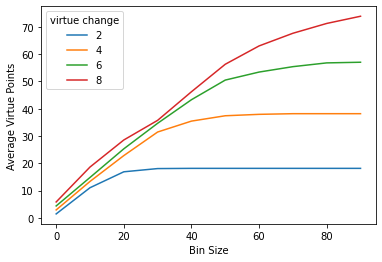

In [ ]:
line1, =plt.plot(x2_binsize,y2_vp)
line2, =plt.plot(x2_binsize,y4_vp)
line3, =plt.plot(x2_binsize,y6_vp)
line4, =plt.plot(x2_binsize,y8_vp)
plt.legend([line1,line2,line3,line4],[2,4,6,8],title="virtue change")
# plt.axhline(y=18.16, color="red")
plt.xlabel("Bin Size")
plt.ylabel("Average Virtue Points")

Text(0, 0.5, 'Average Cost')

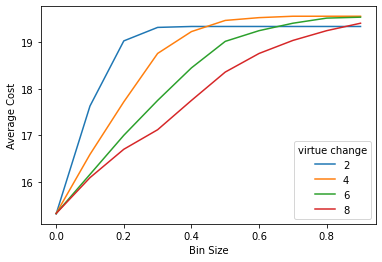

In [ ]:
x_binsize = list(outcomeNetwork.keys())
line1, =plt.plot(x_binsize,y2_cost)
line2, =plt.plot(x_binsize,y4_cost)
line3, =plt.plot(x_binsize,y6_cost)
line4, =plt.plot(x_binsize,y8_cost)
plt.legend([line1,line2,line3,line4],[2,4,6,8],title="virtue change")
# plt.axhline(y=18.16, color="red")
plt.xlabel("Bin Size")
plt.ylabel("Average Cost")

Text(0, 0.5, 'Average Utility')

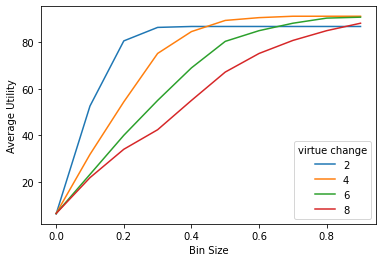

In [ ]:
x_binsize = list(outcomeNetwork.keys())
line1, =plt.plot(x_binsize,y2_utility)
line2, =plt.plot(x_binsize,y4_utility)
line3, =plt.plot(x_binsize,y6_utility)
line4, =plt.plot(x_binsize,y8_utility)
plt.legend([line1,line2,line3,line4],[2,4,6,8],title="virtue change")
# plt.axhline(y=18.16, color="red")
plt.xlabel("Bin Size")
plt.ylabel("Average Utility")

Text(0, 0.5, 'Average Burnouts')

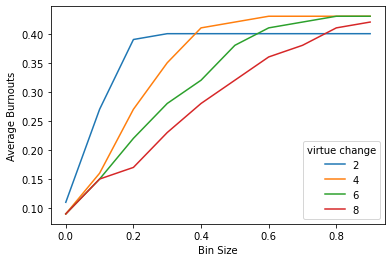

In [ ]:
x_binsize = list(outcomeNetwork.keys())
line1, =plt.plot(x_binsize,y2_burnouts)
line2, =plt.plot(x_binsize,y4_burnouts)
line3, =plt.plot(x_binsize,y6_burnouts)
line4, =plt.plot(x_binsize,y8_burnouts)
plt.legend([line1,line2,line3,line4],[2,4,6,8],title="virtue change")
# plt.axhline(y=18.16, color="red")
plt.xlabel("Bin Size")
plt.ylabel("Average Burnouts")

ValueError: shape mismatch: objects cannot be broadcast to a single shape

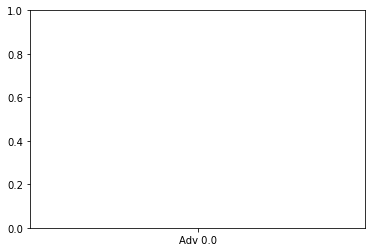

In [ ]:
# yvals = [outcomeNetwork["Utilitarian"].getResilience(), outcomeNetwork["Deontology"].getResilience(), outcomeNetwork["Virtue"].getResilience(), outcomeNetwork["Transcendence"].getResilience()]
yvals = []
for i in outcomeNetwork.keys():
    yvals.append(outcomeNetwork[i].getResilience())
xvals = ["Adv 0.0", "Adv 0.2", "Adv 0.4", "Adv 0.6", "Adv 0.8"]
plt.bar(xvals, yvals,color=['b','g','r','y'], align='center', alpha=0.5, ecolor='black', capsize=10)
# for i in range(len(xvals)):
#     plt.text(i,yvals[i]/2,yvals[i],ha = 'center')
plt.ylabel("Resilience")
plt.xlabel("Type of Agent")


In [ ]:
outcomeNetwork.keys()

dict_keys([0.0, 0.2, 0.4, 0.6000000000000001, 0.8])

[69.6, 30.8, 11.0, -18.4, -56.8]


/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:92: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(range(len(outcomeNetwork)),list(outcomeNetwork.keys()))


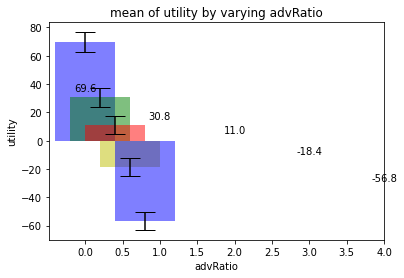

In [ ]:
utility_list = plotNetworkVaryParams(outcomeNetwork, 'utility', attr, plotType="bar", metric="mean")
print(utility_list)

[18.48, 16.54, 15.55, 14.08, 12.16]


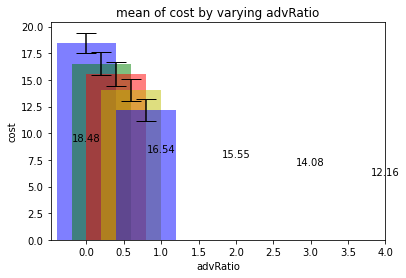

In [ ]:
costList = plotNetworkVaryParams(outcomeNetwork, 'cost', attr, plotType="bar", metric="mean")
print(costList)

[38, 23, 19, 9, 5]


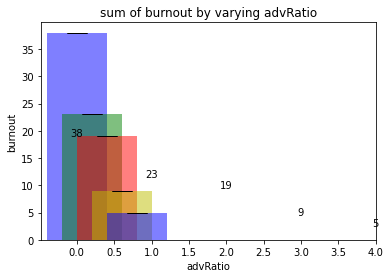

In [ ]:
burnoutList = plotNetworkVaryParams(outcomeNetwork, 'burnout', attr, plotType="bar", metric="sum")
print(burnoutList)

[8.48, 6.54, 5.55, 4.08, 2.16]


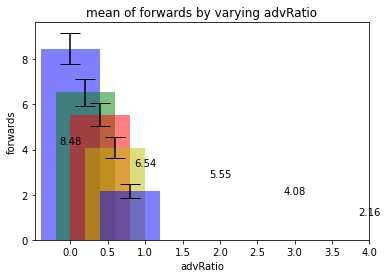

In [ ]:
forwardsList = plotNetworkVaryParams(outcomeNetwork, 'forwards', attr, plotType="bar", metric="mean")
print(forwardsList)

[1.52, 3.46, 4.45, 5.92, 7.84]


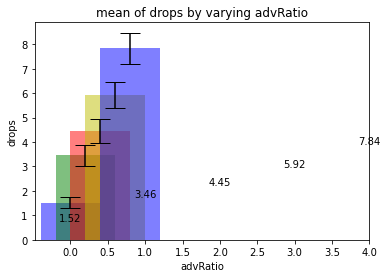

In [ ]:
dropsList = plotNetworkVaryParams(outcomeNetwork, 'drops', attr, plotType="bar", metric="mean")
print(dropsList)

[1.52, 3.46, 4.45, 5.92, 7.84]


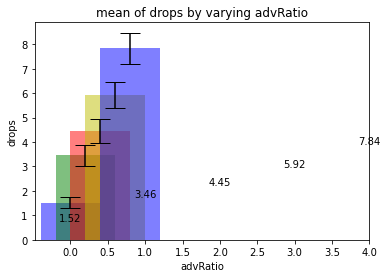

In [ ]:
dropsList = plotNetworkVaryParams(outcomeNetwork, 'drops', attr, plotType="bar", metric="mean")
print(dropsList)

In [ ]:
# plotAgentWiseVaryParams(outcomeNetwork, "utility", attr, plotType="line")

AttributeError: 'populationGraph' object has no attribute 'nodes'

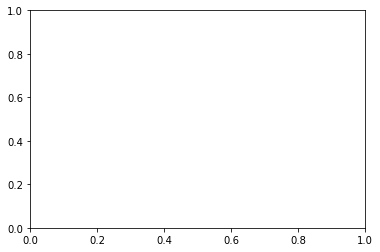

In [ ]:
plotAgentWiseVaryParams(outcomeNetwork, "cost", attr, plotType="stem")

/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(range(numNodes), propertyValues, color,markerfmt=color+'o', basefmt=" ", label=label)


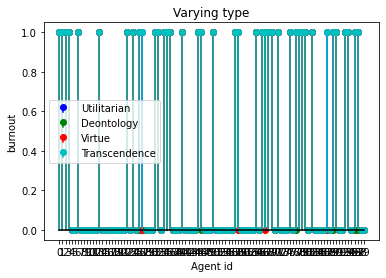

In [ ]:
plotAgentWiseVaryParams(outcomeNetwork, "burnout", attr, plotType="stem")

/Users/janvichhabra/Documents/acad/Comparative-Ethics/plotFunctions.py:92: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(range(len(outcomeNetwork)),list(outcomeNetwork.keys()))


[9200, 7160, 8460, 9200]

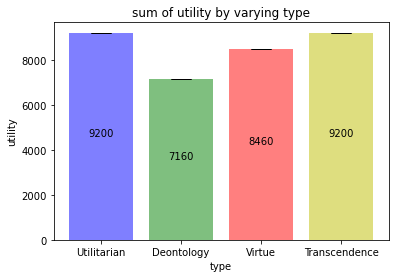

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'utility', attr, plotType="bar")

[1960.0, 1858.0, 1923.0, 1960.0]

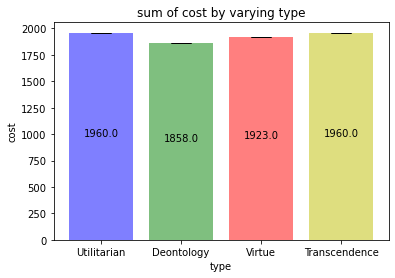

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'cost', attr, plotType="bar")

[40, 32, 36, 40]

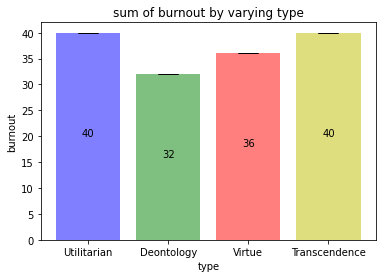

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'burnout', attr, plotType="bar")

[960, 858, 923, 960]

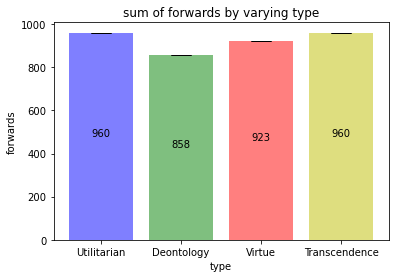

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'forwards', attr, plotType="bar")

[40, 142, 77, 40]

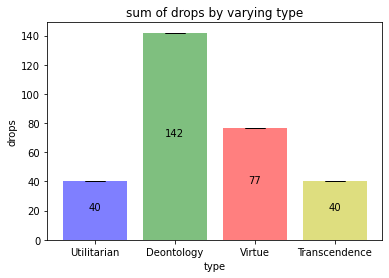

In [ ]:
plotNetworkVaryParams(outcomeNetwork, 'drops', attr, plotType="bar")

In [ ]:
print(G.nodes[0]['agent'].burnoutCount)
print(G.nodes[0]['agent'].burnoutThreshold)

1
20.0


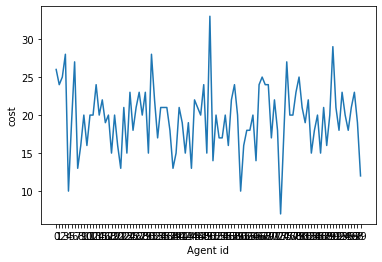

In [ ]:
plotAgentwiseProp(G, "cost")

In [ ]:
plotAgentwiseProp(G, "virtuePoints", plotMean=True)

Not applicable property


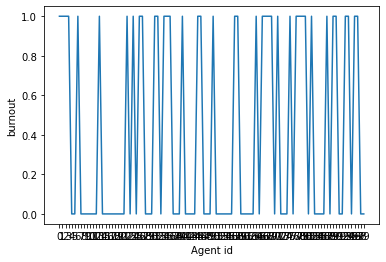

In [ ]:
plotAgentwiseProp(G, "burnout")

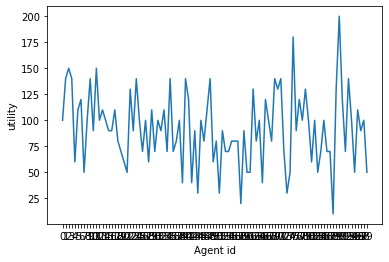

In [ ]:
plotAgentwiseProp(G, "utility")